In [21]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from scipy.stats import linregress

# Import API key
from api_keys import g_key
from api_keys import weather_api_key

#genre_df = Spotify Dataset 1921-2020, 160k+ Tracks

file='../Datasets/data_by_genres.csv'
genre_df=pd.read_csv(file)
genre_df

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.166667,5,1
1,[],0.679245,0.521473,2.298526e+05,0.401522,0.196737,0.221586,-12.679076,0.112267,112.025168,0.515920,21.682005,7,1
2,a cappella,0.621532,0.577017,1.936522e+05,0.345694,0.003799,0.127087,-12.770211,0.095324,111.813230,0.453186,43.351819,11,1
3,abstract,0.359395,0.459500,3.430185e+05,0.487000,0.791400,0.119480,-14.092000,0.043420,124.743200,0.304990,41.500000,1,1
4,abstract beats,0.353347,0.694400,2.338244e+05,0.613400,0.349403,0.102453,-6.699800,0.143453,119.398400,0.634187,58.600000,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,zolo,0.218600,0.560365,2.675453e+05,0.611985,0.152665,0.190792,-11.499268,0.064295,123.283566,0.596705,33.760410,9,1
2660,zouglou,0.124000,0.834000,2.951470e+05,0.674000,0.000000,0.082800,-13.455000,0.072100,119.039000,0.951000,56.000000,7,0
2661,zouk,0.233181,0.752762,2.951100e+05,0.627238,0.301195,0.083224,-10.864476,0.038110,101.681762,0.844381,42.476190,4,1
2662,zouk riddim,0.052700,0.776000,2.293330e+05,0.656000,0.565000,0.044500,-14.316000,0.034100,99.981000,0.966000,24.000000,4,1


In [2]:
#Demostrar el grado de valence en los Top 100 de géneros populares
genres_energy=genre_df[["genres","energy","danceability","loudness","popularity","valence"]]
genres_energy=genres_energy.sort_values(by="energy", ascending=False)

In [3]:
genre = []
valence = 0
popularity = 0
loudness = 0
danceability = 0
energy = 0
valences = []
popularities = []
loudnesses = []
danceabilities = []
energies = []
countries =["mexican", "australian", "argentine", "colombian", "chile", "japan", "chinese", "spanish", "canadian",
            "american", "french", "german", "russia", "indonesian", "indian", "south african", "nigerian",
           "belgian", "brazil", "british", "czech", "danish", "dutch", "greek", "icelandic", "israeli"]
for country in countries:
    for i in range(len(genres_energy["genres"])):
        if country in genres_energy["genres"][i]:
            genre.append(genres_energy["genres"][i])
            valence += genres_energy["valence"][i]
            popularity += genres_energy["popularity"][i]
            loudness += genres_energy["loudness"][i]
            danceability += genres_energy["danceability"][i]
            energy += genres_energy["energy"][i]
    popularities.append(popularity/len(genre))
    valences.append(valence/len(genre))
    loudnesses.append(loudness/len(genre))
    danceabilities.append(danceability/len(genre))
    energies.append(energy/len(genre))
    
countries_df = pd.DataFrame({"Country gender": countries, "Valence": valences, "Popularity": popularities, "Loudness": loudnesses,
                            "Danceability": danceabilities, "Energy": energies})

# Aqui empieza mi parte - Gabi

In [14]:
target = ["Mexico", "Australia", "Argentina", "Colombia", "Chile", "Japan", "China", "Spain","Canada", "America", 
          "France", "Germany", "Russia", "Indonesia", "India", "South Africa", "Nigeria", "Belgium", "Brazil", 
          "United Kingdom", "Czech Republic", "Denmark", "Netherlands", "Greece", "Iceland", "Israel"]
responses = []
for country in target:
        params={"address": country, "key":g_key}
        base_url = "https://maps.googleapis.com/maps/api/geocode/json"
        response = requests.get(base_url, params=params).json()
        responses.append(response)

In [15]:
latitudes = []
longitudes = []
for resp in responses:
    latitudes.append(resp["results"][0]["geometry"]["location"]["lat"])
    longitudes.append(resp["results"][0]["geometry"]["location"]["lng"])

In [75]:
coordinates_df = pd.DataFrame({"Country":target, "Latitude": latitudes, "Longitude": longitudes})

In [77]:
merge_df = pd.merge(coordinates_df, countries_df, right_index=True, left_index=True)
merge_df = merge_df.drop(columns=["Country gender", "Longitude"])
merge_df

,Country,Latitude,Valence,Popularity,Loudness,Danceability,Energy
0,Mexico,23.634501,0.654865,43.723646,-9.533351,0.607258,0.571412
1,Australia,-25.274398,0.553333,47.182220,-8.789137,0.568589,0.612060
2,Argentina,-38.416097,0.552665,48.300370,-8.906935,0.577643,0.607922
3,Colombia,4.570868,0.580249,47.514584,-8.777791,0.589612,0.616911
4,Chile,-35.675147,0.586239,47.866569,-8.672206,0.599598,0.613682
5,Japan,36.204824,0.564465,46.863352,-8.780045,0.564683,0.628826
6,China,35.861660,0.535777,46.179930,-9.395783,0.552971,0.601100
7,Spain,40.463667,0.536934,44.992632,-9.540664,0.551359,0.597286
8,Canada,56.130366,0.516080,44.862705,-9.589121,0.542240,0.594845
9,America,37.090240,0.507144,44.354185,-9.924788,0.535418,0.578607


In [82]:
# Create Northern Hemisphere DataFrame
country_n = []
Latitude =[]
Valence = []
Popularity = []
Loudness = []
Danceability = []
Energy = []

for i in range(len(merge_df["Country"])):
    if (merge_df["Latitude"][i] >= 0):
        country_n.append(merge_df["Country"][i])
        Latitude.append(merge_df["Latitude"][i])
        Valence.append(merge_df["Valence"][i])
        Popularity.append(merge_df["Popularity"][i])
        Loudness.append(merge_df["Loudness"][i])
        Danceability.append(merge_df["Danceability"][i])
        Energy.append(merge_df["Energy"][i])

northern_df = pd.DataFrame({"Country": country_n, "Latitude": Latitude, "Valence": Valence, "Popularity": Popularity, 
                            "Loudness": Loudness, "Danceability": Danceability, "Energy": Energy})

In [97]:
# Create Southern Hemisphere DataFrame
country_n = []
Latitude =[]
Valence = []
Popularity = []
Loudness = []
Danceability = []
Energy = []

for i in range(len(merge_df["Country"])):
    if (merge_df["Latitude"][i] < 0):
        country_n.append(merge_df["Country"][i])
        Latitude.append(merge_df["Latitude"][i])
        Valence.append(merge_df["Valence"][i])
        Popularity.append(merge_df["Popularity"][i])
        Loudness.append(merge_df["Loudness"][i])
        Danceability.append(merge_df["Danceability"][i])
        Energy.append(merge_df["Energy"][i])

southern_df = pd.DataFrame({"Country": country_n, "Latitude": Latitude, "Valence": Valence, "Popularity": Popularity, 

SyntaxError: unexpected EOF while parsing (<ipython-input-97-d7036321cb0e>, line 20)

In [117]:
#Function for scatter plots
def northScatterPlt(x_name,y_name):
    x_values = northern_df[x_name]
    y_values = northern_df[y_name]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-squared is: {rvalue**2}")
    plt.scatter(x_values,y_values, facecolors="salmon", edgecolor="black")
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(x_name + " vs " + y_name + " in the North Hemisphere")
    if y_name == "Valence":
        plt.annotate(line_eq,(20,0.6),fontsize=15,color="red")
    elif y_name == "Popularity":
        plt.annotate(line_eq,(10,45.5),fontsize=15,color="red")
    elif y_name == "Loudness":
        plt.annotate(line_eq,(10,-9.1),fontsize=15,color="red")
    elif y_name == "Danceability" or y_name == "Energy":
        plt.annotate(line_eq,(20,0.59),fontsize=15,color="red")
    plt.show()

In [119]:
#Function for scatter plots
def southScatterPlt(x_name,y_name):
    x_values = southern_df[x_name]
    y_values = southern_df[y_name]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-squared is: {rvalue**2}")
    plt.scatter(x_values,y_values, facecolors="salmon", edgecolor="black")
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(x_name + " vs " + y_name + " in the South Hemisphere")
    if y_name == "Valence":
        plt.annotate(line_eq,(-20,0.54),fontsize=15,color="red")
    elif y_name == "Popularity":
        plt.annotate(line_eq,(-20,46),fontsize=15,color="red")
    elif y_name == "Loudness":
        plt.annotate(line_eq,(-20,-9.25),fontsize=15,color="red")
    elif y_name == "Danceability":
        plt.annotate(line_eq,(-20,0.58),fontsize=15,color="red")
    elif y_name == "Energy":
        plt.annotate(line_eq,(-20,0.59),fontsize=15,color="red")
    plt.show()

The r-squared is: 0.23411963586553464


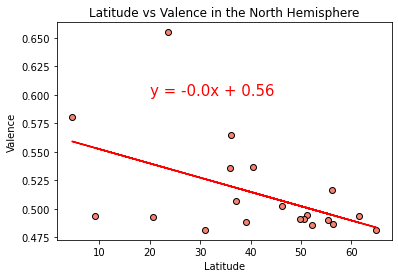

In [93]:
northScatterPlt("Latitude","Valence")

The r-squared is: 0.4813856212391221


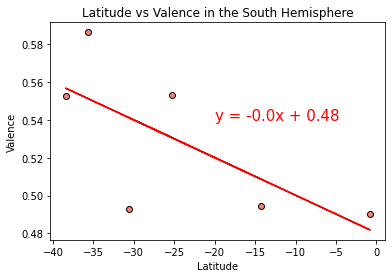

In [96]:
southScatterPlt("Latitude","Valence")

The r-squared is: 0.17318033599484878


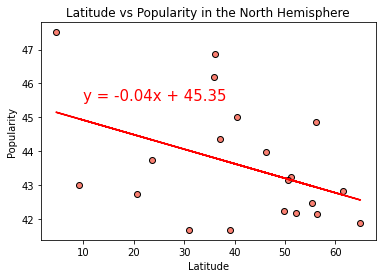

In [103]:
northScatterPlt("Latitude","Popularity")

The r-squared is: 0.5011288382602744


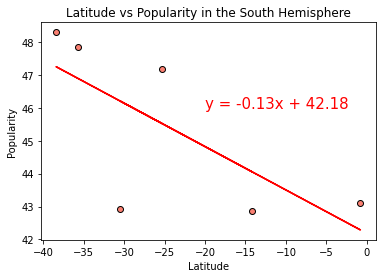

In [104]:
southScatterPlt("Latitude","Popularity")

The r-squared is: 0.18267847618420474


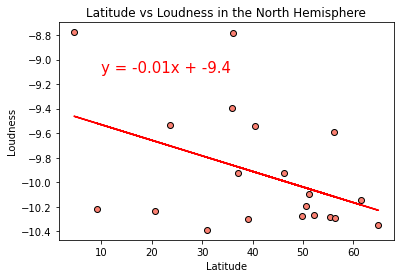

In [108]:
northScatterPlt("Latitude","Loudness")

The r-squared is: 0.4382422957463362


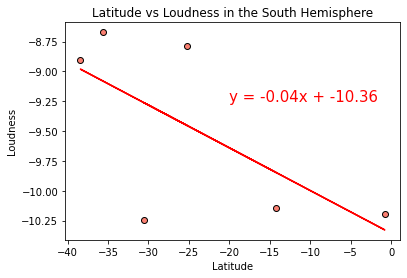

In [109]:
southScatterPlt("Latitude","Loudness")

The r-squared is: 0.27766207893189404


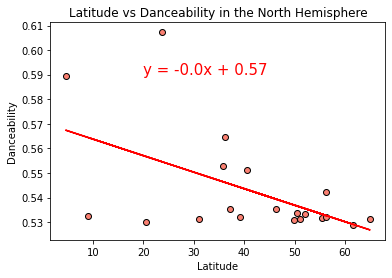

In [110]:
northScatterPlt("Latitude","Danceability")

The r-squared is: 0.5248666380878603


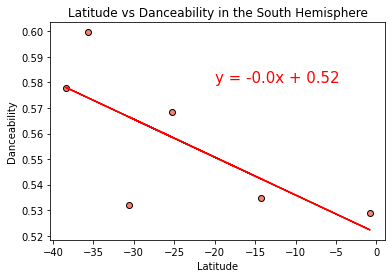

In [113]:
southScatterPlt("Latitude","Danceability")

The r-squared is: 0.08219289878769344


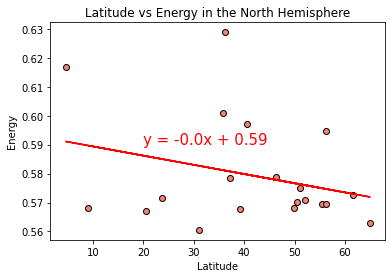

In [115]:
northScatterPlt("Latitude","Energy")

The r-squared is: 0.42111798597679695


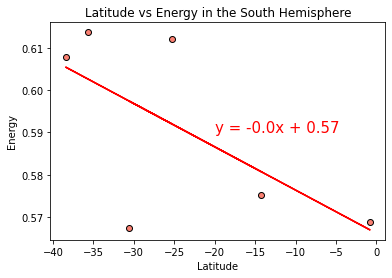

In [120]:
southScatterPlt("Latitude","Energy")

In [73]:
# Access maps with unique API key
gmaps.configure(api_key=g_key)

In [121]:
# Store latitude and longitude in coordinates
coordinates = coordinates_df[["Latitude", "Longitude"]]
# Plote Heatmap
fig = gmaps.figure(map_type="TERRAIN")
# Create heatmap layer
heat_layer = gmaps.heatmap_layer(coordinates, weights=merge_df["Valence"], dissipating=False, max_intensity=1, point_radius=0.5)
#Add layer
fig.add_layer(heat_layer)
#Display figure
fig

Figure(layout=FigureLayout(height='420px'))